## Final Project Submission

* Student names: Amos Kipkirui, Brian Muli, Emilly Njue, Swaleh Athuman, Samwel Kagwi
* Students pace: Full time
* Scheduled project review date/time: 21/04/2023
* Instructor name: 
* Blog post URL: https://github.com/swalehmwadime/dsc-phase-2-project-v2-3.git


# BUSINESS UNDERSTANDING

### INTRODUCTION

The real estate market is a dynamic and ever-changing industry, and accurate prediction of housing prices is crucial for both buyers and sellers. In order to make informed decisions, stakeholders in the real estate industry need access to reliable and comprehensive data.

The King County House Sales dataset is a valuable resource for understanding the dynamics of the real estate market in King County. This dataset contains detailed information on house sale prices including a wide range of features such as the number of bedrooms, bathrooms, square footage, location, and more. 

This dataset allows for in-depth analysis and modeling to understand the factors that influence housing prices in the region, and serves as a valuable resource for developing and testing predictive models for accurate price predictions.


We will provide an overview of the King County House Sales dataset, including its key features, data quality, and potential use cases. We will also highlight the significance of this dataset for evaluating regression models to predict housing prices in King County, and the potential benefits it can offer to stakeholders in the real estate industry. 

### Business Problem
A real estate agency located in King County is looking to advice homeowners about how home renovations might increase the value of their homes, and by what amount. The agency is looking to use the King County house dataset provided to make recommendations on the best renovations that home owners can undertake.

### PROBLEM STATEMENT
To aid in making these recommendations, we will attempt to answer these questions:

1. Predict House sale prices given other house specifications

2. Determine what are the key factors that significantly impact housing prices in King County?

3. How does the number of bedrooms, bathrooms, and square footage of a house correlate with its sale price in King County?

4. How does the overall grade of a house, year built, and year renovated affect its sale price in King County?

# Data Understanding
This project uses the King County House Sales dataset.

In [34]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Set the Seaborn style
sns.set_style("darkgrid")

import statsmodels.api as sm

In [35]:
data=pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [38]:
import pandas as pd

def analyze(data):
    
    # Check the shape (rows and columns) of the DataFrame
    print("Shape of the DataFrame:")
    print(data.shape)

    # Display the first few rows of the DataFrame
    print("\nFirst few rows of the DataFrame:")
    print(pd.DataFrame(data.head()))

    # Check the data types of each column in the DataFrame
    print("\nData types of columns in the DataFrame:")
    print(data.dtypes)

    # Check for missing values in the DataFrame
    print("\nMissing values in the DataFrame:")
    print(data.isnull().sum())

    # Drop columns with missing values
    data.dropna(axis=1, inplace=True)

    # Check for duplicate rows in the DataFrame
    print("\nDuplicate rows in the DataFrame:")
    print(data.duplicated().sum())

    # Check for unique values in each column of the DataFrame
    print("\nUnique values in each column of the DataFrame:")
    for col in data.columns:
        unique_values = data[col].nunique()
        print(f"{col}: {unique_values}")

    # Check value counts of categorical columns in the DataFrame
    print("\nValue counts of categorical columns:")
    for col in data.columns:
        if data[col].dtype == 'object':
            print(f"{col}:")
            print(data[col].value_counts())
            print()
            
            relevant_columns=['sqft_living','bathrooms','sqft_living15','bedrooms','price','grade','sqft_above']
            data=data[relevant_columns]#dropping all the unnecessary columns
analyze(data)


Shape of the DataFrame:
(21597, 21)

First few rows of the DataFrame:
           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     lo

KeyError: 'sqft_lot'

In [20]:
data.describe()

,price,sqft_living,sqft_living15,bathrooms,bedrooms
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2080.321850,1986.620318,2.115826,3.373200
std,3.673681e+05,918.106125,685.230472,0.768984,0.926299
min,7.800000e+04,370.000000,399.000000,0.500000,1.000000
25%,3.220000e+05,1430.000000,1490.000000,1.750000,3.000000
50%,4.500000e+05,1910.000000,1840.000000,2.250000,3.000000
75%,6.450000e+05,2550.000000,2360.000000,2.500000,4.000000
max,7.700000e+06,13540.000000,6210.000000,8.000000,33.000000


From description we can see that:

- Average price of house sold in King County is $5,402,966.

- The maximum price of house sold in King County is $7,700,000.

- The average no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms/bedroom with one house having 33 bedrooms.

- The average area of house is 2080 Sqft with one house having 13540 Sqft. living area.

In [21]:
pd.DataFrame(data.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
sqft_living15,0.585241
bathrooms,0.525906
bedrooms,0.308787


<AxesSubplot:>

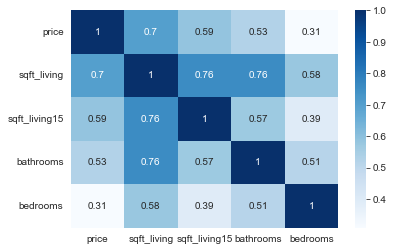

In [22]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='bedrooms'>

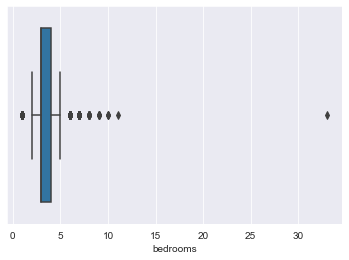

In [46]:
sns.boxplot(x='bedrooms',data=data)

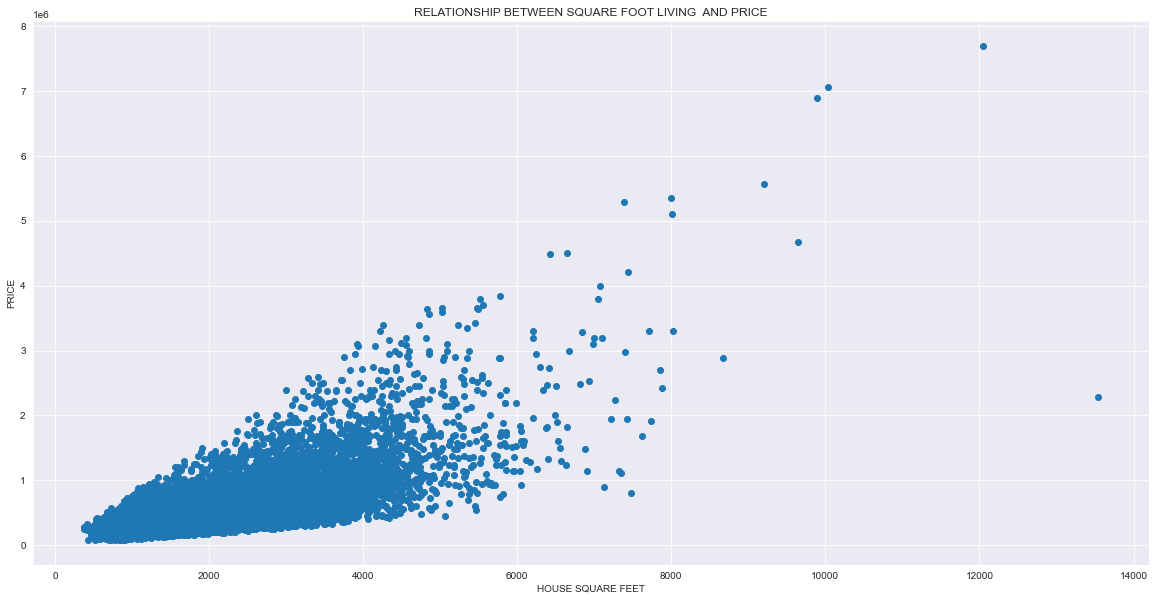

In [24]:

fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(data['sqft_living'], data['price'])
ax.set_xlabel('HOUSE SQUARE FEET')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN SQUARE FOOT LIVING  AND PRICE');


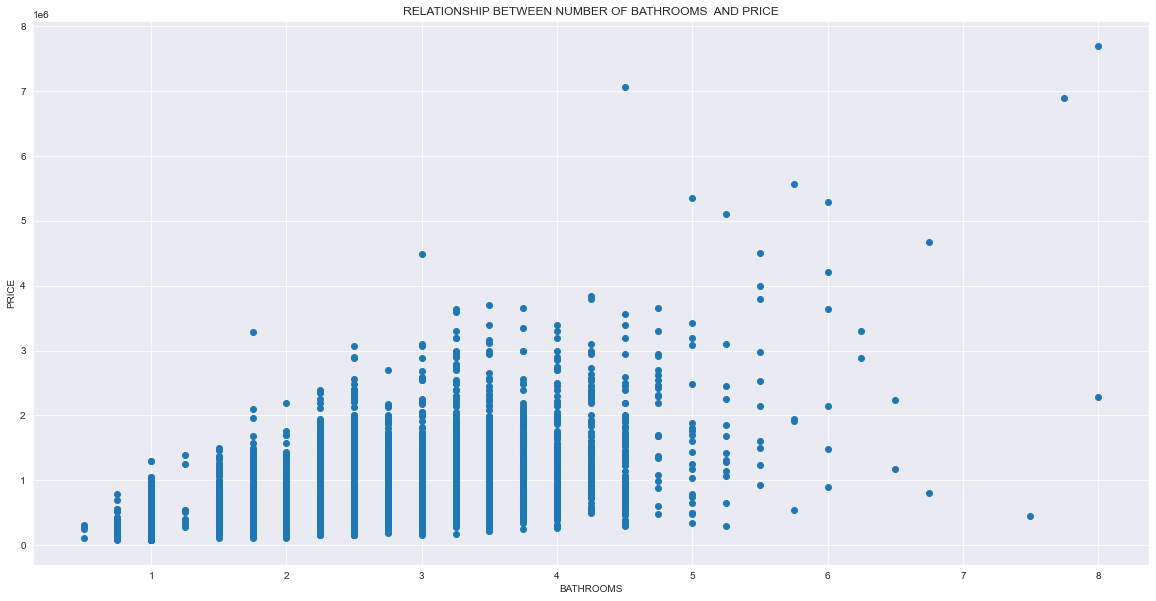

In [25]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(data['bathrooms'], data['price'])
ax.set_xlabel('BATHROOMS')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN NUMBER OF BATHROOMS  AND PRICE');


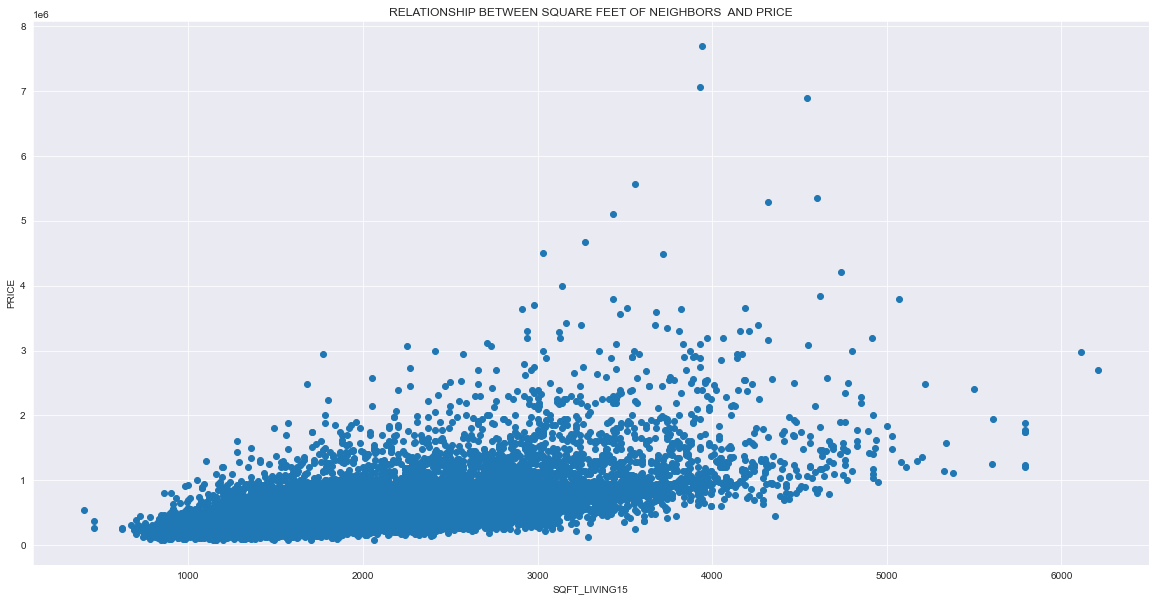

In [26]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(data['sqft_living15'], data['price'])
ax.set_xlabel('SQFT_LIVING15')
ax.set_ylabel('PRICE')
ax.set_title('RELATIONSHIP BETWEEN SQUARE FEET OF NEIGHBORS  AND PRICE');


In [40]:
data = data[['price', 'sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms']]

y = data['price']

X = data[['sqft_living']]

In [41]:
model = sm.OLS(y, sm.add_constant(X))
fit = model.fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:31:04   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

C:\Users\DELL\anaconda9169\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Interpretation of the model

* The model is statistically significant overall, with an F-statistic p-value well below 0.05

* The model explains about 49% of the variance in price

* The model coefficients (`const` and `sqft_living`) are both statistically significant, with t-statistic p-values well below 0.05

* As the value of "sqft_living" increases, the estimated "price" decreases by -43,990 , assuming all other variables are held constant.

* For each increase of 1 "sqft_living", we see an associated increase in price of about 280

In [28]:
X_update = data[['sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms']]

data

,price,sqft_living,sqft_living15,bathrooms,bedrooms
0,221900.0,1180,1340,1.00,3
1,538000.0,2570,1690,2.25,3
2,180000.0,770,2720,1.00,2
3,604000.0,1960,1360,3.00,4
4,510000.0,1680,1800,2.00,3
...,...,...,...,...,...
21592,360000.0,1530,1530,2.50,3
21593,400000.0,2310,1830,2.50,4
21594,402101.0,1020,1020,0.75,2
21595,400000.0,1600,1410,2.50,3


In [29]:
second_model = sm.OLS(y, sm.add_constant(X_update))
model_fit = second_model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5671.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        09:10:26   Log-Likelihood:            -2.9964e+05
No. Observations:               21597   AIC:                         5.993e+05
Df Residuals:                   21592   BIC:                         5.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.124e+04   7785.367      2.728

C:\Users\DELL\anaconda9169\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### **Initial model interpretation**
* The model explains a `51%` of the variance in `price` which shows an increase compared to the first model which had a variance of `49%` with only one predictor (sqft_living).

* The model is `statistically significant` overall, with an F-statistic p-value well below 0.05.

* The model coefficients (`const`, `sqft_living`, `sqft_living15`, `bathrooms`, `bedrooms`) are both statistically significant, with t-statistic p-values well below 0.05

* If a house had `0 sqft_living, 0 sqft_living15, 0 bathrooms and 0 bedrooms` we would expect the price to be about $21,240

* For each increase of `1 sqft in sqft_living`, we see an associated increase in price of about $275

* For each increase of `1 sqft in sqft_living15`, we see an associated increase in price of about $60

* For each increase of `1 bathroom`, we see an associated increase in price of about $7,230

* For each increase of `1 bedroom` , we see an associated decrease in price of about $55,580




In [30]:
X_metric = X_update.copy()
#change square feet to square meters 1sqft = 0.092903

for col in X_metric.columns:
    X_metric[col] = X_metric[['sqft_living', 'sqft_living15']] * 0.092903

X_metric

ValueError: Columns must be same length as key

In [ ]:
metric_model = sm.OLS(y, sm.add_constant(X_metric)).fit()
print(metric_model.summary())